## Proyecto Final
**Integrantes**

* Jonathan Alonso

* Jheison Torres

In [30]:
#importar librerias 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import warnings  
warnings.filterwarnings('ignore')



In [31]:
#cargar dataset
df=pd.read_csv('../Datos/ObesityDataSet_raw_and_data_sinthetic.csv')
#valida primeros registros del dataframe
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [32]:
#informacion Df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [33]:
#cantidad de filas y columnas
df.shape

(2111, 17)

In [34]:
#variables categoricas
categoricas=df.select_dtypes(include=['object']).columns.tolist()
print('Variables cualitativas:', categoricas)

#variables numericas
numericas=df.select_dtypes(include=['float64']).columns.tolist()
print('Variables numericas:', numericas)

Variables cualitativas: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
Variables numericas: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


In [35]:
#valida estadisticos
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


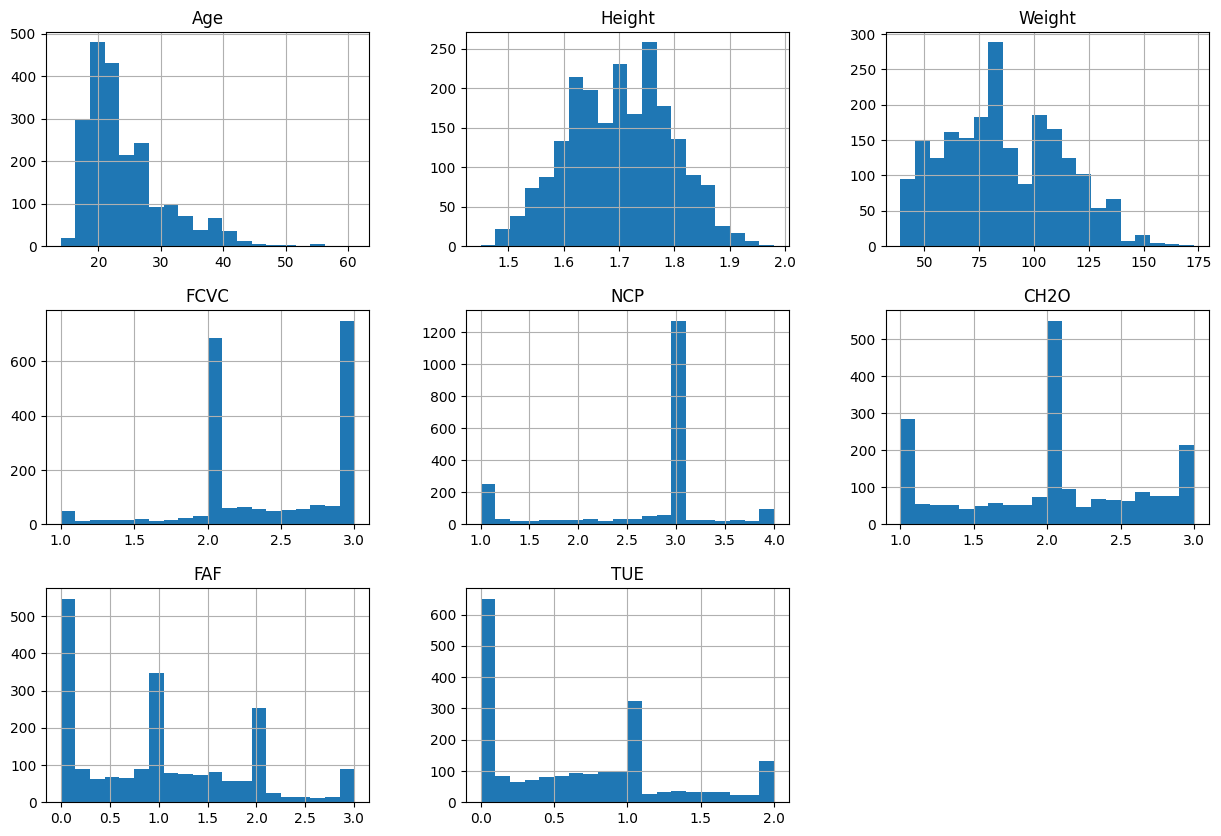

In [36]:
#histograma
df.hist(figsize=(15,10), bins=20)
plt.show()

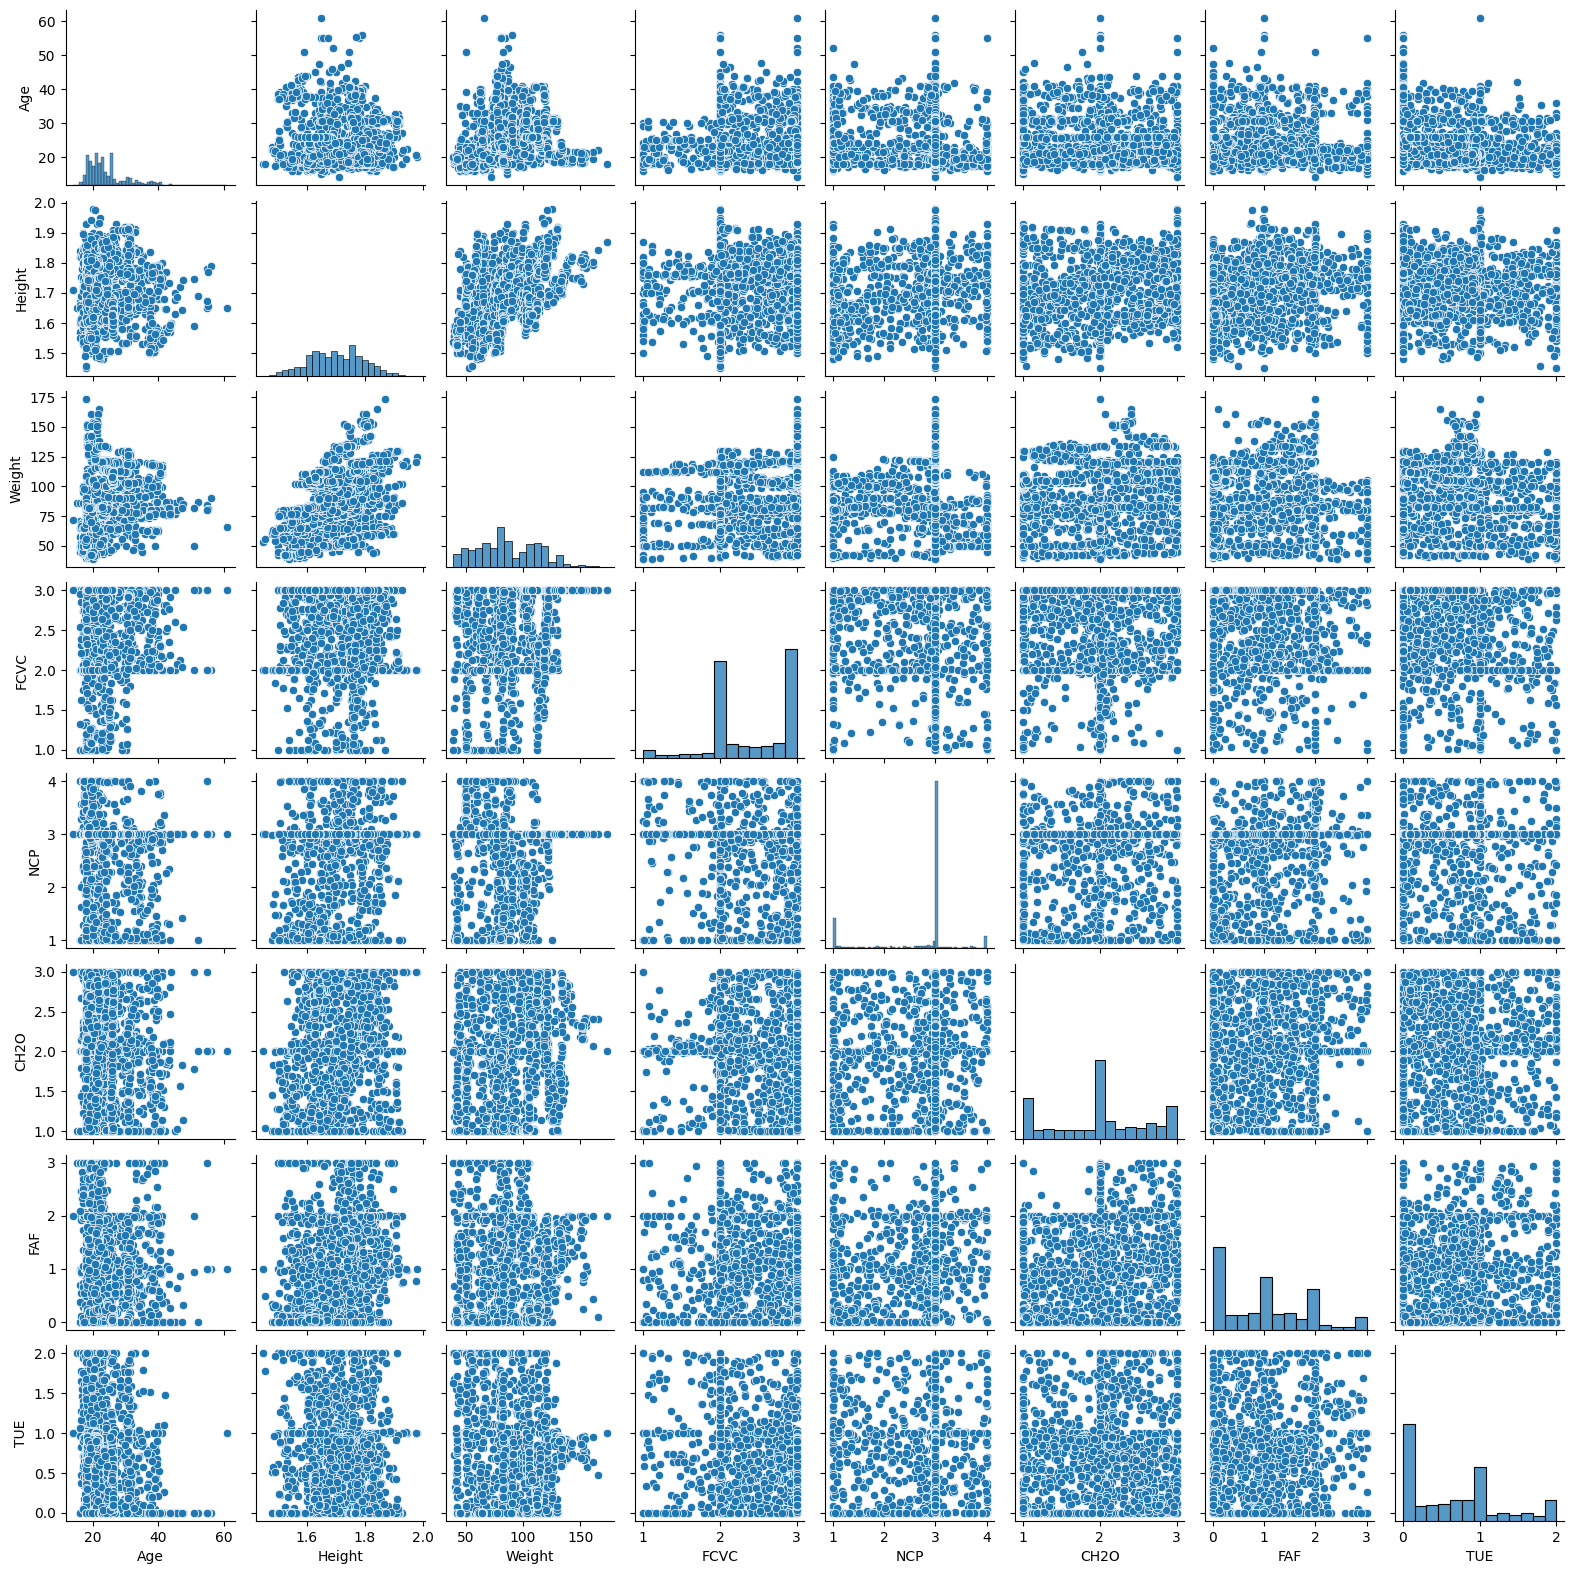

In [37]:
sns.pairplot(df, height=2)
plt.show()

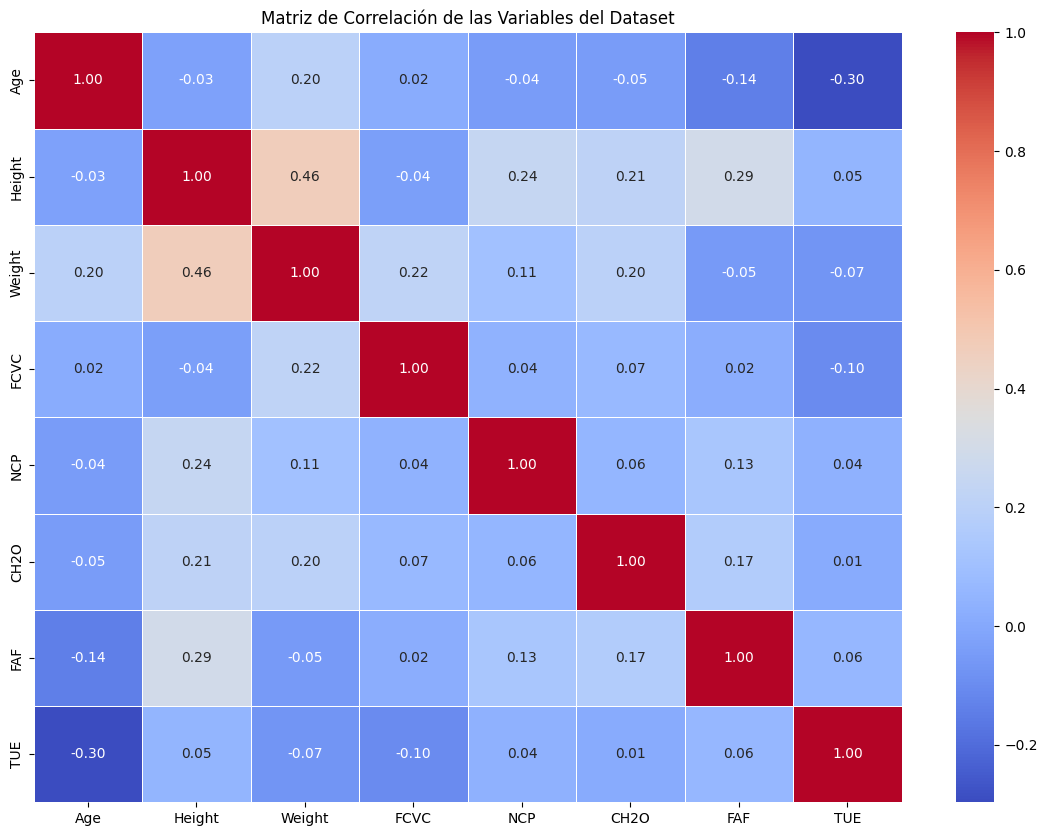

In [38]:
# Calcular la matriz de correlación
correlation_matrix = df[numericas].corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(14, 10))

# Crear un mapa de calor para la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Mostrar el gráfico
plt.title("Matriz de Correlación de las Variables del Dataset")
plt.show()


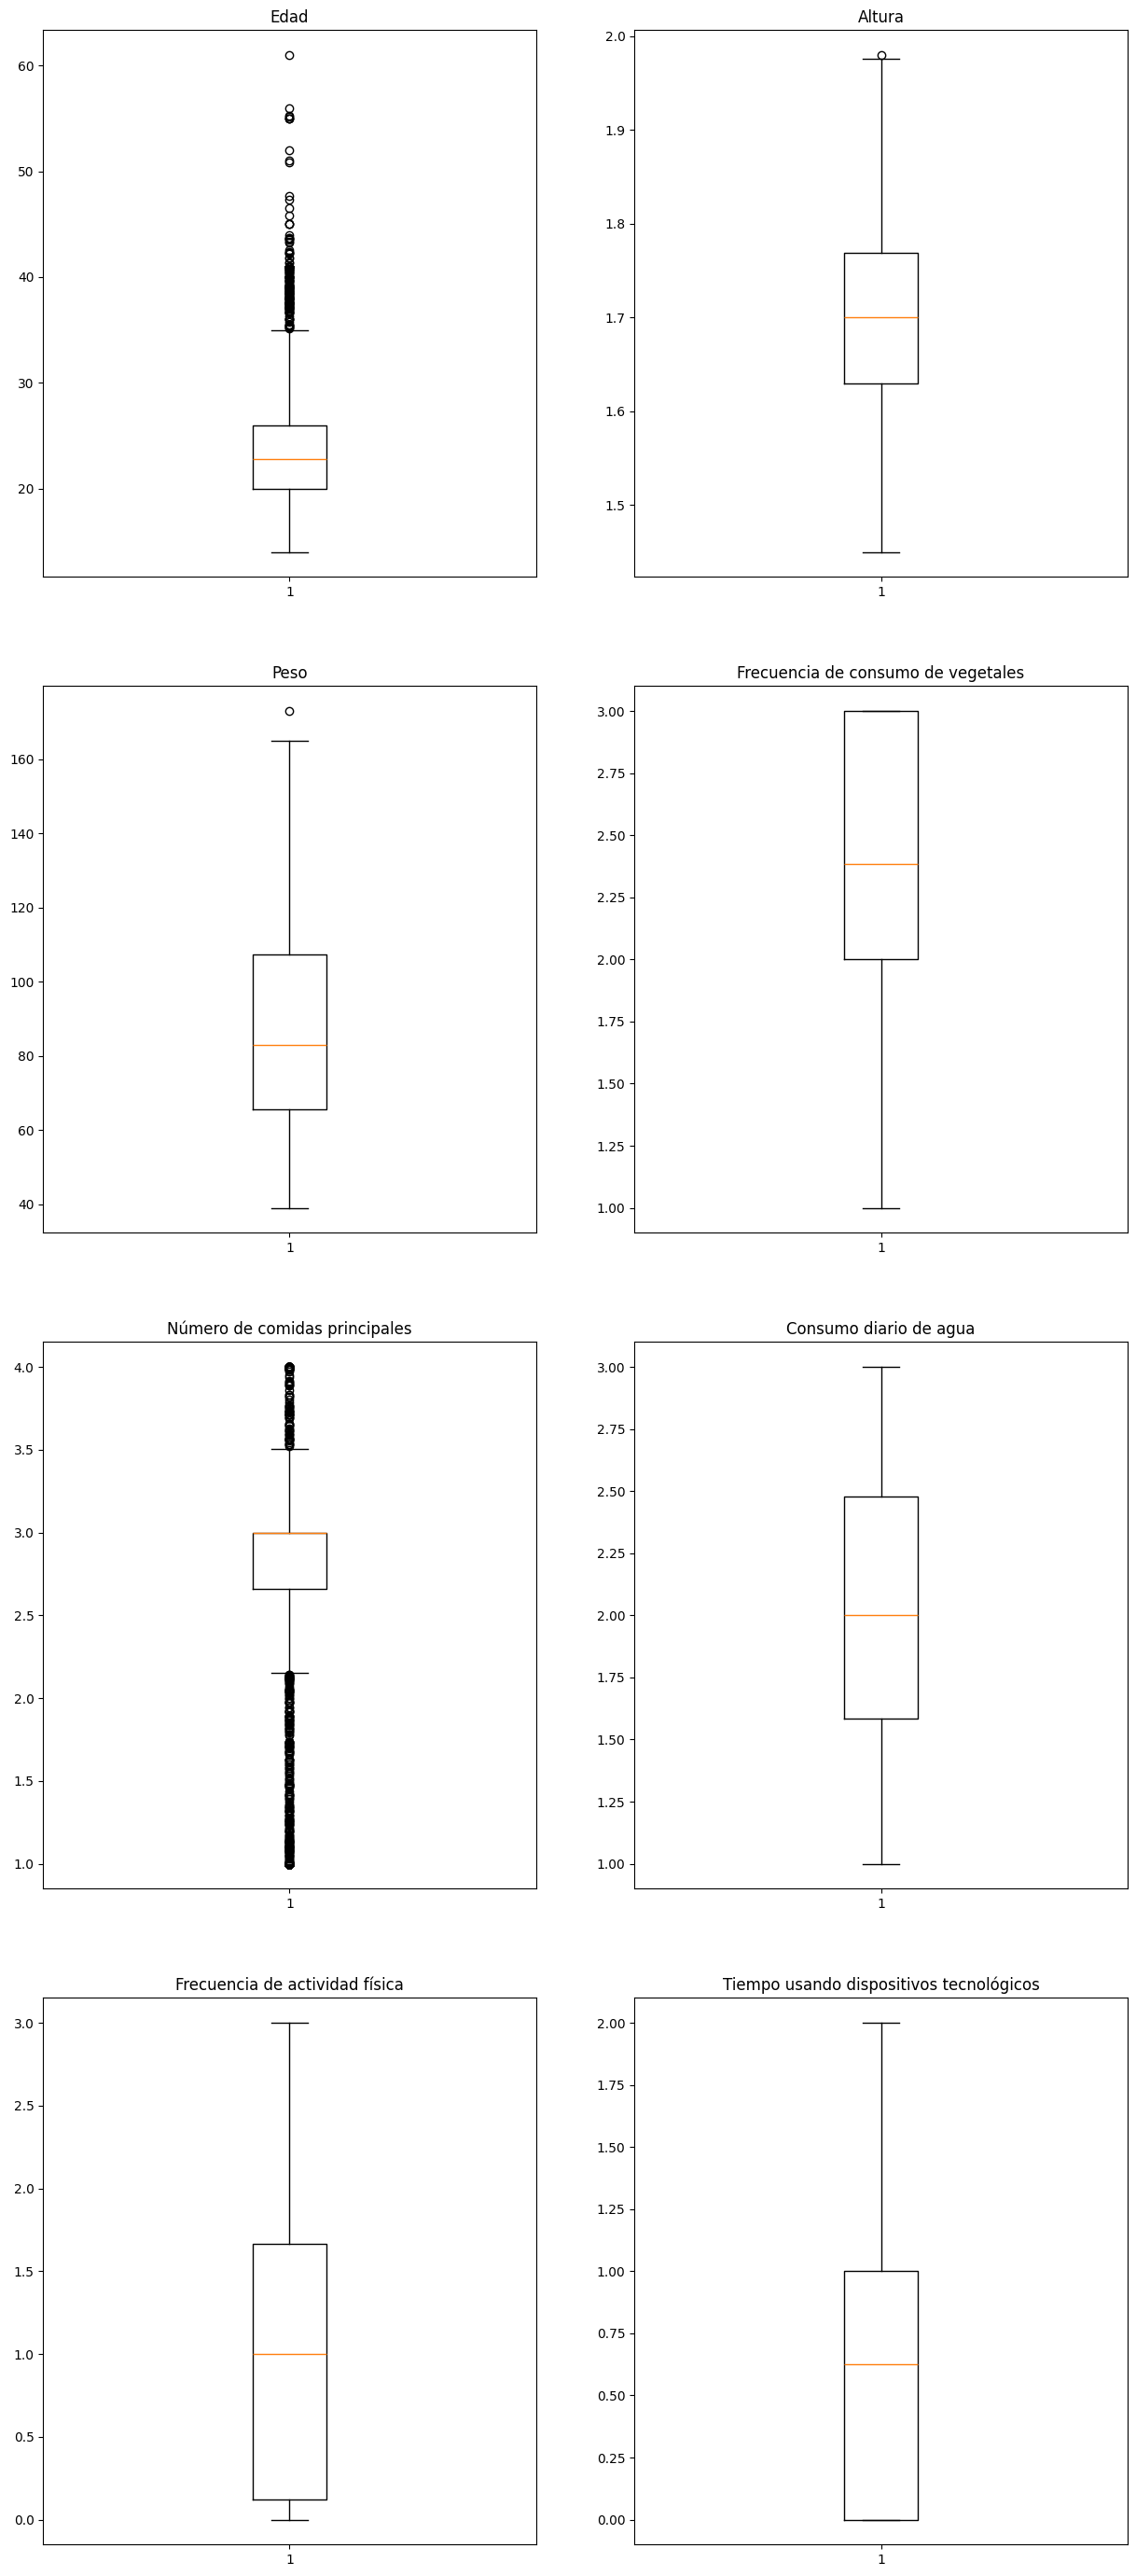

In [39]:
# Box plot
plt.figure(figsize=(15,35))
plt.subplot(4,2,1)
plt.boxplot(df.Age)
plt.title('Edad')
plt.subplot(4,2,2)
plt.boxplot(df.Height)
plt.title('Altura')
plt.subplot(4,2,3)
plt.boxplot(df.Weight)
plt.title('Peso')
plt.subplot(4,2,4)
plt.boxplot(df.FCVC)
plt.title('Frecuencia de consumo de vegetales')
plt.subplot(4,2,5)
plt.boxplot(df.NCP)
plt.title('Número de comidas principales')
plt.subplot(4,2,6)
plt.boxplot(df.CH2O)
plt.title('Consumo diario de agua')
plt.subplot(4,2,7)
plt.boxplot(df.FAF)
plt.title('Frecuencia de actividad física')
plt.subplot(4,2,8)
plt.boxplot(df.TUE)
plt.title('Tiempo usando dispositivos tecnológicos')
plt.show()

In [40]:
#Frecuencia variable objetivo
obesidad_counts=df['NObeyesdad'].value_counts()
obesidad_counts

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

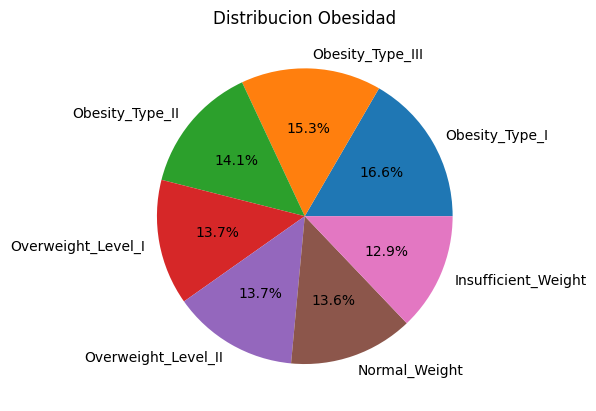

In [41]:
# Gráfico tipo pie
plt.pie(obesidad_counts, 
        labels=obesidad_counts.index, 
        autopct='%1.1f%%')
plt.title('Distribucion Obesidad')
plt.show()

In [42]:
selected_columns = ['Gender','Age','family_history_with_overweight','FAVC','FCVC','NCP','CAEC','SMOKE','CH2O','SCC','FAF','TUE','CALC','MTRANS','NObeyesdad']
procesamiento = df[selected_columns].copy()

label_encoder = LabelEncoder()
for column in categoricas:
    procesamiento[column] = label_encoder.fit_transform(procesamiento[column])

procesamiento.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [43]:
X=procesamiento.drop(['NObeyesdad'], axis=1)
y=df['NObeyesdad']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0.0,0.148936,1.0,0.0,0.5,0.666667,0.666667,0.0,0.5,0.0,0.000000,0.5,1.000000,0.75
1,0.0,0.148936,1.0,0.0,1.0,0.666667,0.666667,1.0,1.0,1.0,1.000000,0.0,0.666667,0.75
2,1.0,0.191489,1.0,0.0,0.5,0.666667,0.666667,0.0,0.5,0.0,0.666667,0.5,0.333333,0.75
3,1.0,0.276596,0.0,0.0,1.0,0.666667,0.666667,0.0,0.5,0.0,0.666667,0.0,0.333333,1.00
4,1.0,0.170213,0.0,0.0,0.5,0.000000,0.666667,0.0,0.5,0.0,0.000000,0.0,0.666667,0.75


## Clasificación Modelo NO Supervisado

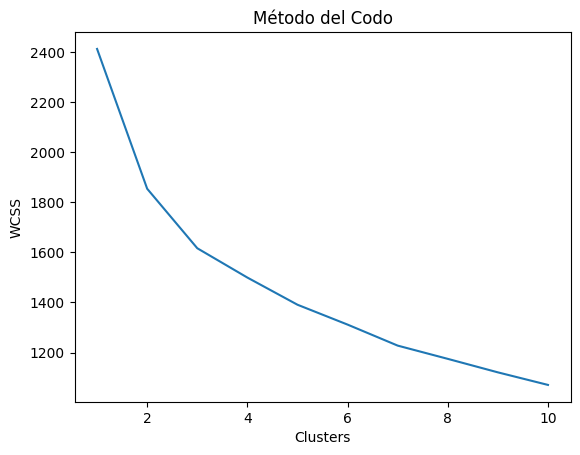

In [44]:
# Choosing the Number of Clusters (k)
# Using the Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the results of the Elbow method
plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [45]:
# numero de clusters
optimal_k = 3

# entrena modeloa
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

cluster_labels = kmeans.labels_

df['Cluster'] = cluster_labels

In [46]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Cluster
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,1
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,0
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,2
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,2


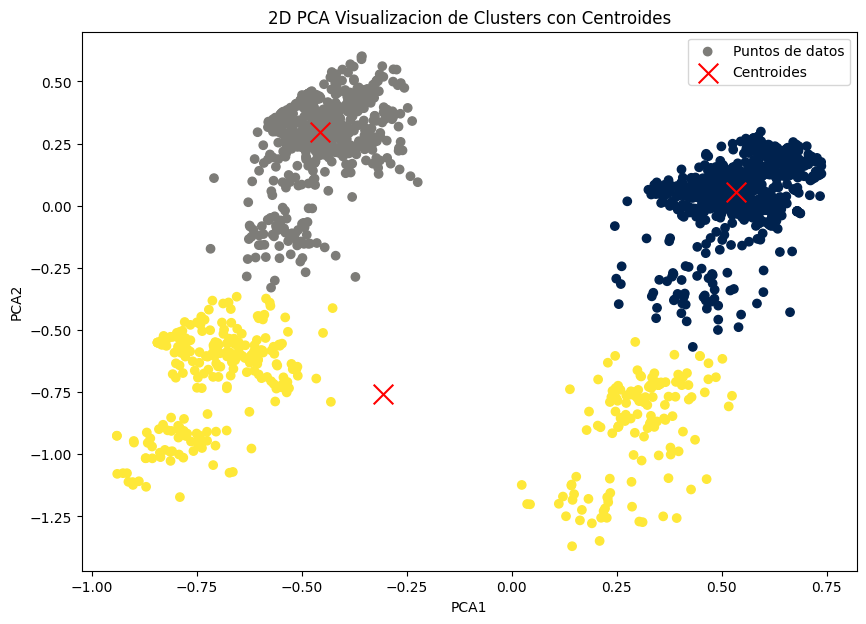

In [47]:
from sklearn.decomposition import PCA

# inicializa PCA
pca = PCA(n_components=3)
df_pca = pca.fit_transform(X_scaled)
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

# PCA inicializacion y transformacion
plt.figure(figsize=(10, 7))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters, cmap='cividis', marker='o', label='Puntos de datos')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='x', s=200, label='Centroides')
plt.title('2D PCA Visualizacion de Clusters con Centroides')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

In [48]:
# Definir k para clustering
k = 3

# Clustering K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)
silhouette_kmeans = silhouette_score(X_scaled, labels_kmeans)
print(f"Coeficiente de Silueta para K-Means: {silhouette_kmeans:.4f}")

# Clustering Jerárquico
agg = AgglomerativeClustering(n_clusters=k, linkage='ward')
labels_agg = agg.fit_predict(X_scaled)
silhouette_agg = silhouette_score(X_scaled, labels_agg)
print(f"Coeficiente de Silueta para Clustering Jerárquico: {silhouette_agg:.4f}")

# DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)
mask = labels_dbscan != -1
if len(set(labels_dbscan)) > 1:
    silhouette_dbscan = silhouette_score(X_scaled[mask], labels_dbscan[mask])
    print(f"Coeficiente de Silueta para DBSCAN: {silhouette_dbscan:.4f}")
else:
    print("DBSCAN no encontró clústeres distintos.")

# Modelo de Mezcla Gaussiana
gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
labels_gmm = gmm.fit_predict(X_scaled)
silhouette_gmm = silhouette_score(X_scaled, labels_gmm)
print(f"Coeficiente de Silueta para GMM: {silhouette_gmm:.4f}")

Coeficiente de Silueta para K-Means: 0.2485
Coeficiente de Silueta para Clustering Jerárquico: 0.2156
DBSCAN no encontró clústeres distintos.
Coeficiente de Silueta para GMM: 0.2485


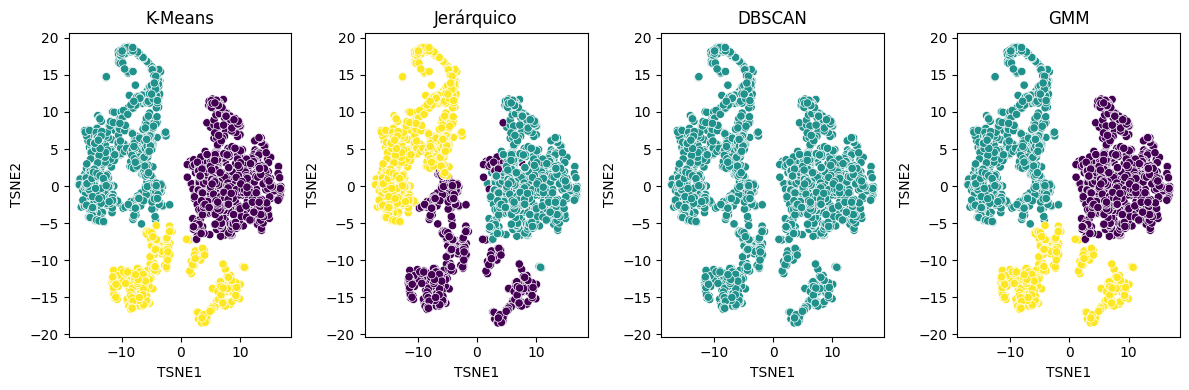

In [49]:
## Visualización de los resultados

import matplotlib.pyplot as plt
import seaborn as sns

# Crear un DataFrame con los resultados
results = pd.DataFrame({
    'K-Means': labels_kmeans,
    'Jerárquico': labels_agg,
    'DBSCAN': labels_dbscan,
    'GMM': labels_gmm
})

# Visualizar los resultados
## Hagamos un Tsne para visualizar los resultados

from sklearn.manifold import TSNE
tsne=TSNE(n_components=3, random_state=42)
X_tsne=tsne.fit_transform(X_scaled)

results['TSNE1'] = X_tsne[:,0]
results['TSNE2'] = X_tsne[:,1]

plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
sns.scatterplot(x='TSNE1', y='TSNE2', hue='K-Means', palette='viridis', legend=False, data=results)
plt.title('K-Means')

plt.subplot(1, 4, 2)
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Jerárquico', palette='viridis', legend=False, data=results)
plt.title('Jerárquico')

plt.subplot(1, 4, 3)
sns.scatterplot(x='TSNE1', y='TSNE2', hue='DBSCAN', palette='viridis', legend=False, data=results)
plt.title('DBSCAN')

plt.subplot(1, 4, 4)
sns.scatterplot(x='TSNE1', y='TSNE2', hue='GMM', palette='viridis', legend=False, data=results)
plt.title('GMM')

plt.tight_layout()
plt.show()

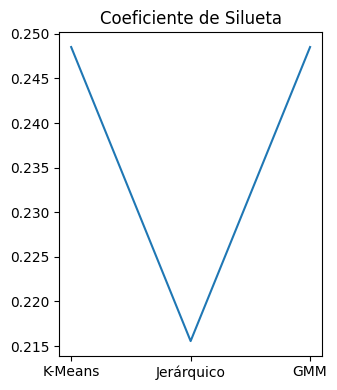

In [50]:
## Visualización de los Coeficientes de Silueta
from sklearn.metrics import silhouette_score

plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
sns.lineplot(x=['K-Means', 'Jerárquico', 'GMM'], y=[silhouette_kmeans, silhouette_agg, silhouette_gmm])

plt.title('Coeficiente de Silueta')

plt.tight_layout()
plt.show()

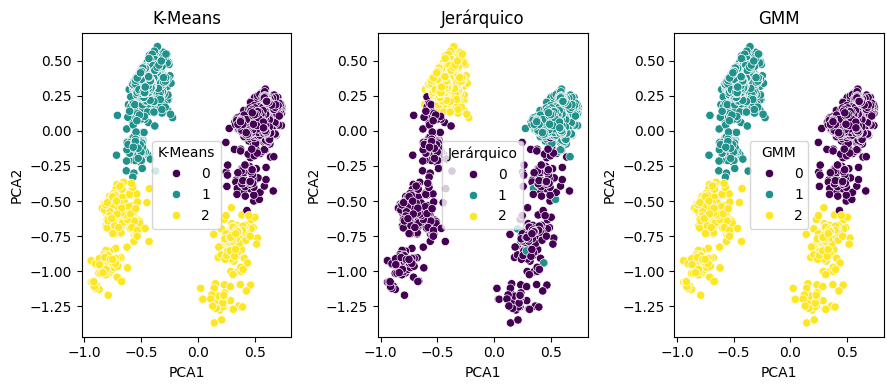

In [51]:
## Visualización de los resultados

import matplotlib.pyplot as plt
import seaborn as sns

# Crear un DataFrame con los resultados
results = pd.DataFrame({
    'K-Means': labels_kmeans,
    'Jerárquico': labels_agg,
    'GMM': labels_gmm
})

# Visualizar los resultados
## Hagamos un PCA para visualizar los resultados

from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

results['PCA1'] = X_pca[:,0]
results['PCA2'] = X_pca[:,1]

plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
sns.scatterplot(x='PCA1', y='PCA2', hue='K-Means', palette='viridis',  data=results)
plt.title('K-Means')

plt.subplot(1, 4, 2)
sns.scatterplot(x='PCA1', y='PCA2', hue='Jerárquico', palette='viridis',  data=results)
plt.title('Jerárquico')

plt.subplot(1, 4, 3)
sns.scatterplot(x='PCA1', y='PCA2', hue='GMM', palette='viridis',  data=results)
plt.title('GMM')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Target')

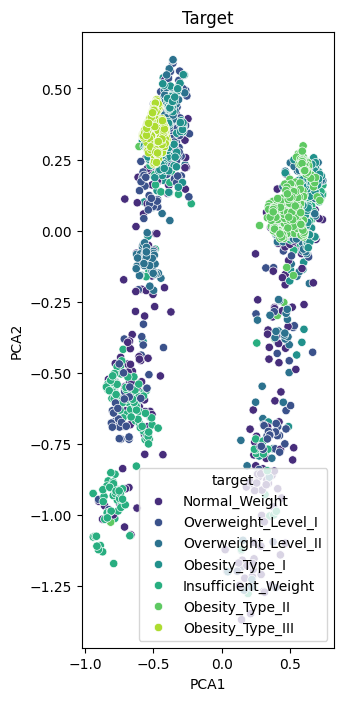

In [52]:
## Comparemos PCA con Target

results['target'] = y

plt.figure(figsize=(15, 8))

plt.subplot(1, 4, 1)
sns.scatterplot(x='PCA1', y='PCA2', hue='target', palette='viridis',  data=results)
plt.title('Target')

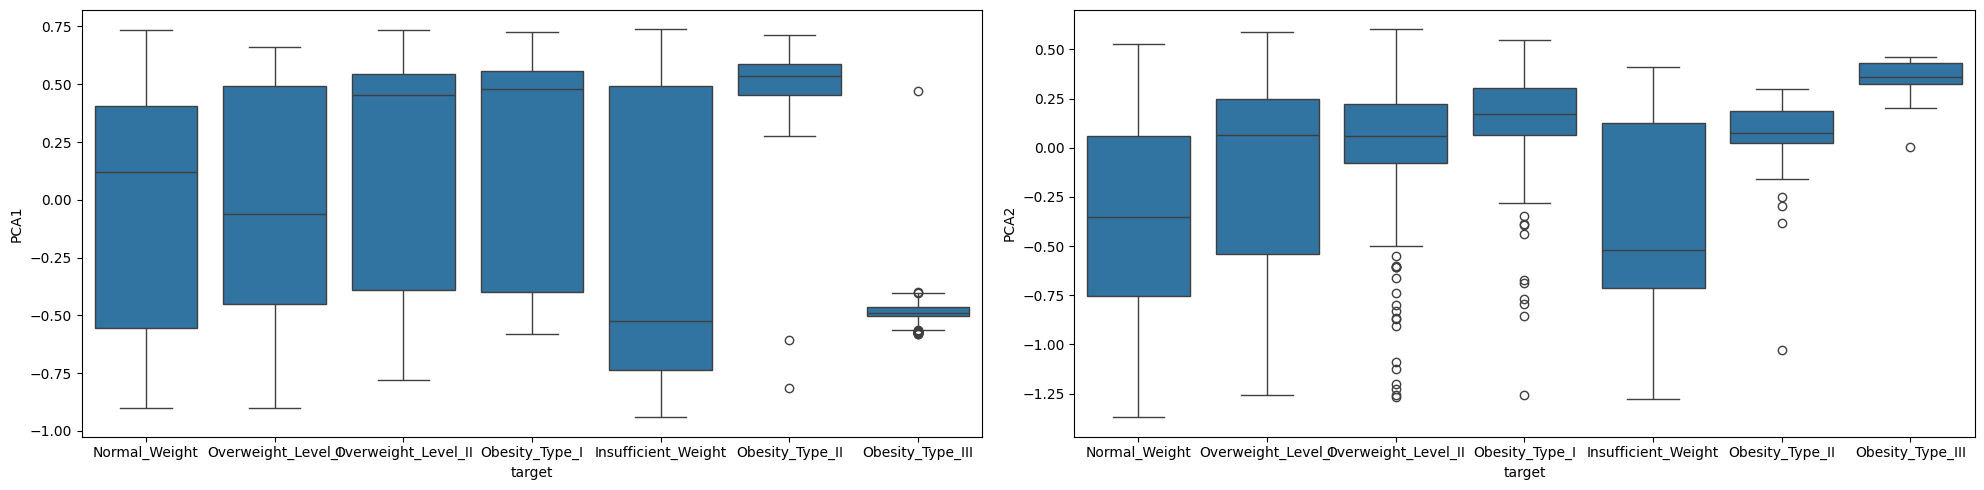

In [53]:
## Usemos un boxplot para comparar PCA con Target

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='target', y='PCA1', data=results)

plt.subplot(1, 2, 2)
sns.boxplot(x='target', y='PCA2', data=results)

plt.tight_layout()
plt.show()

## Clasificacion Modelo Supervisado

In [54]:
obesidad=df['NObeyesdad'].value_counts()
print(obesidad)

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


In [55]:
#preprocesamiento
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

pre1 = df.copy()
pre1.drop(['NObeyesdad','Height','Weight'], axis=1, inplace=True)

pre1.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Cluster
0,Female,21.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,1
1,Female,21.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,1
2,Male,23.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,0
3,Male,27.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,2
4,Male,22.0,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,2


In [56]:
label_encoder = LabelEncoder()
for column in categorical_columns:
    pre1[column] = label_encoder.fit_transform(pre1[column])

pre1.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Cluster
0,0,21.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,0
3,1,27.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,2
4,1,22.0,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,2


In [57]:
#define variables 
X = pre1
y = df['NObeyesdad']
n_classes = len(set(y))


In [58]:
#RandomForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Dividir el dataset en entrenamiento y prueba
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

#preprocesamiento
scaler = StandardScaler()
X_train_rf = scaler.fit_transform(X_train_rf)
X_test_rf = scaler.transform(X_test_rf)

# Entrenamos el modelo
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train_rf, y_train_rf)

## Predicción
y_pred_rf = modelo_rf.predict(X_test_rf)

## Evaluación
print(classification_report(y_test_rf, y_pred_rf))

                     precision    recall  f1-score   support

Insufficient_Weight       0.88      0.95      0.91        56
      Normal_Weight       0.68      0.73      0.70        62
     Obesity_Type_I       0.85      0.85      0.85        78
    Obesity_Type_II       0.83      0.95      0.89        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.84      0.73      0.78        56
Overweight_Level_II       0.80      0.66      0.73        50

           accuracy                           0.84       423
          macro avg       0.84      0.84      0.84       423
       weighted avg       0.84      0.84      0.84       423



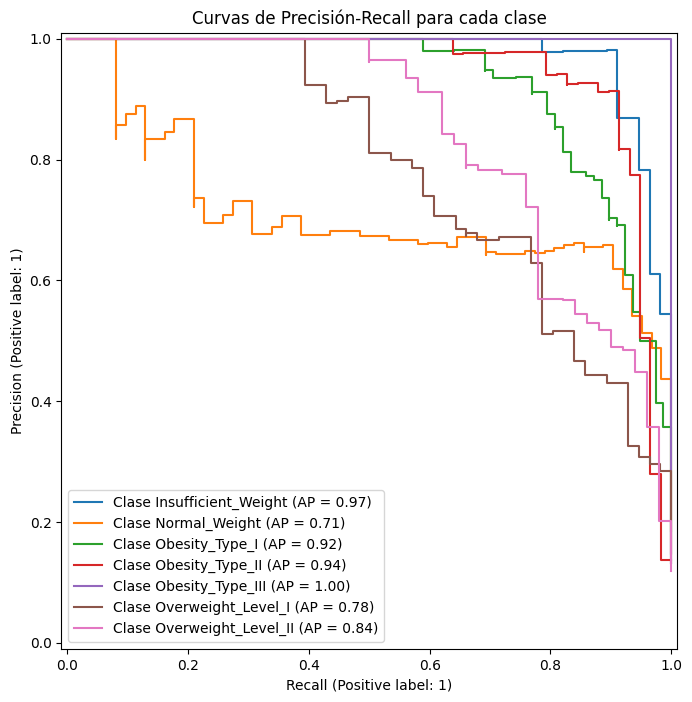

In [59]:
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.multiclass import OneVsRestClassifier

import matplotlib.pyplot as plt

# Entrenar el clasificador One-vs-Rest con RandomForest (o el modelo de tu elección)
modelo_ovr = OneVsRestClassifier(RandomForestClassifier())
modelo_ovr.fit(X_train_rf, y_train_rf)

# Generar la curva de precisión-recall para cada clase
fig, ax = plt.subplots(figsize=(10, 8))
for i, class_label in enumerate(modelo_ovr.classes_):
    PrecisionRecallDisplay.from_estimator(
        modelo_ovr.estimators_[i],
        X_test_rf,
        (y_test_rf == class_label).astype(int),  # Etiquetar binariamente cada clase
        name=f"Clase {class_label}",
        ax=ax
    )

plt.title("Curvas de Precisión-Recall para cada clase")
plt.legend()
plt.show()


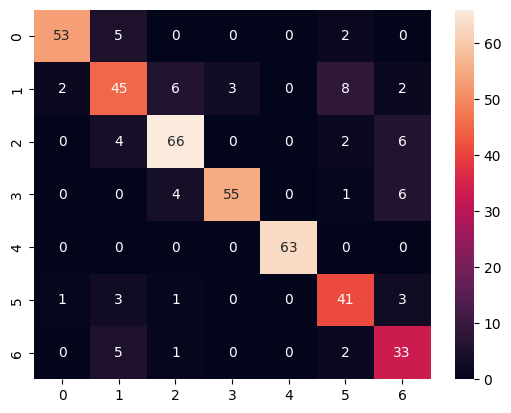

In [60]:
#Matriz de confusion
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_pred_rf, y_test_rf)
sns.heatmap(cm,annot=True)
plt.show()

In [61]:
## Regresón Logistica
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression

## Dividir el dataset en entrenamiento y prueba
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, test_size=0.2, random_state=42)

#preprocesamiento
scaler = StandardScaler()
X_train_lr = scaler.fit_transform(X_train_lr)
X_test_lr = scaler.transform(X_test_lr)

modelo_lr = LogisticRegression(random_state=42)
modelo_lr.fit(X_train_lr, y_train_lr)

## Predicción
y_pred_lr = modelo_lr.predict(X_test_lr)

## Evaluación
print(classification_report(y_test_lr, y_pred_lr))

                     precision    recall  f1-score   support

Insufficient_Weight       0.58      0.70      0.63        56
      Normal_Weight       0.47      0.29      0.36        62
     Obesity_Type_I       0.59      0.63      0.61        78
    Obesity_Type_II       0.59      0.84      0.70        58
   Obesity_Type_III       0.91      1.00      0.95        63
 Overweight_Level_I       0.56      0.45      0.50        56
Overweight_Level_II       0.42      0.32      0.36        50

           accuracy                           0.61       423
          macro avg       0.59      0.60      0.59       423
       weighted avg       0.60      0.61      0.59       423



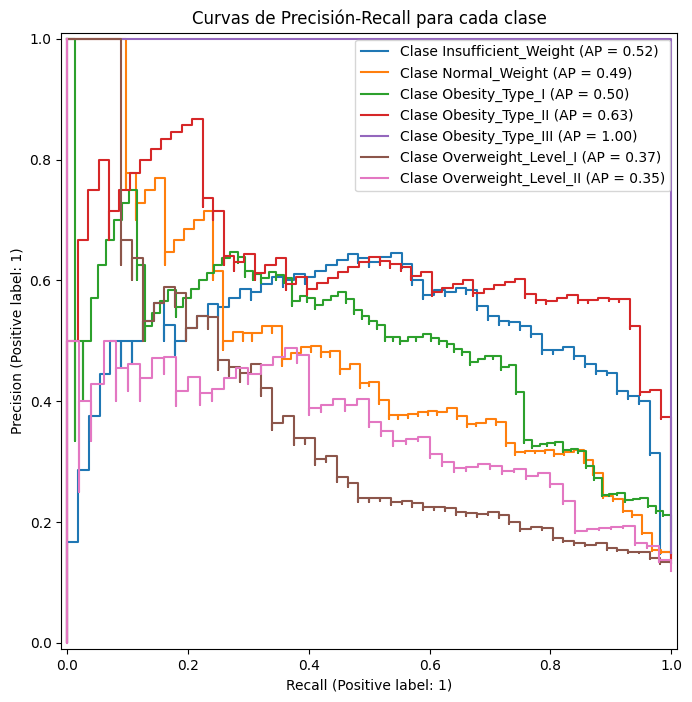

In [62]:
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Entrenar el clasificador One-vs-Rest con Logistic Regression (o el modelo de tu elección)
modelo_ovr = OneVsRestClassifier(LogisticRegression())
modelo_ovr.fit(X_train_lr, y_train_lr)

# Generar la curva de precisión-recall para cada clase
fig, ax = plt.subplots(figsize=(10, 8))
for i, class_label in enumerate(modelo_ovr.classes_):
    PrecisionRecallDisplay.from_estimator(
        modelo_ovr.estimators_[i],
        X_test_lr,
        (y_test_lr == class_label).astype(int),  # Etiquetar binariamente cada clase
        name=f"Clase {class_label}",
        ax=ax
    )

plt.title("Curvas de Precisión-Recall para cada clase")
plt.legend()
plt.show()


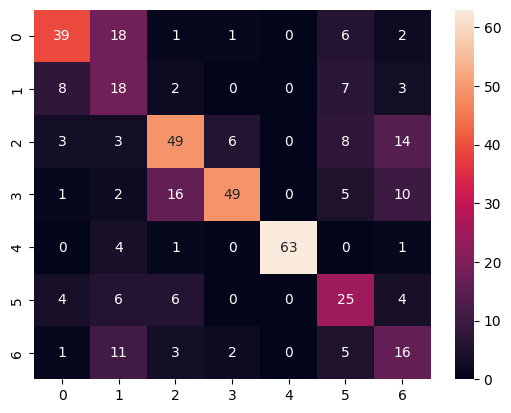

In [63]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_pred_lr, y_test_lr)
sns.heatmap(cm,annot=True)
plt.show()

### Aplicando Gridsearch

In [65]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import randint

# Paso 1: Preparar los datos
X = pre1
y = df['NObeyesdad']  # Variable objetivo

# Dividir los datos en entrenamiento y prueba
X_train_gs, X_test_gs, y_train_gs, y_test_gs = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 2: Definir el modelo
rf = RandomForestClassifier(random_state=42)

# Paso 3: Configurar el espacio de búsqueda de hiperparámetros
# Para GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Paso 4: Ejecutar la búsqueda de hiperparámetros

# Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_gs, y_train_gs)
print("Mejores parámetros (Grid Search):", grid_search.best_params_)

# Paso 5: Evaluar el modelo con los mejores hiperparámetros en el conjunto de prueba
best_rf_grid = grid_search.best_estimator_

# Predicciones y evaluación
y_pred_grid = best_rf_grid.predict(X_test_gs)

print("Rendimiento de Grid Search:")
print(classification_report(y_test_gs, y_pred_grid))



Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejores parámetros (Grid Search): {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Rendimiento de Grid Search:
                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.96      0.94        56
      Normal_Weight       0.66      0.76      0.71        62
     Obesity_Type_I       0.87      0.83      0.85        78
    Obesity_Type_II       0.81      0.95      0.87        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.83      0.71      0.77        56
Overweight_Level_II       0.85      0.66      0.74        50

           accuracy                           0.84       423
          macro avg       0.85      0.84      0.84       423
       weighted avg       0.85      0.84      0.84       423



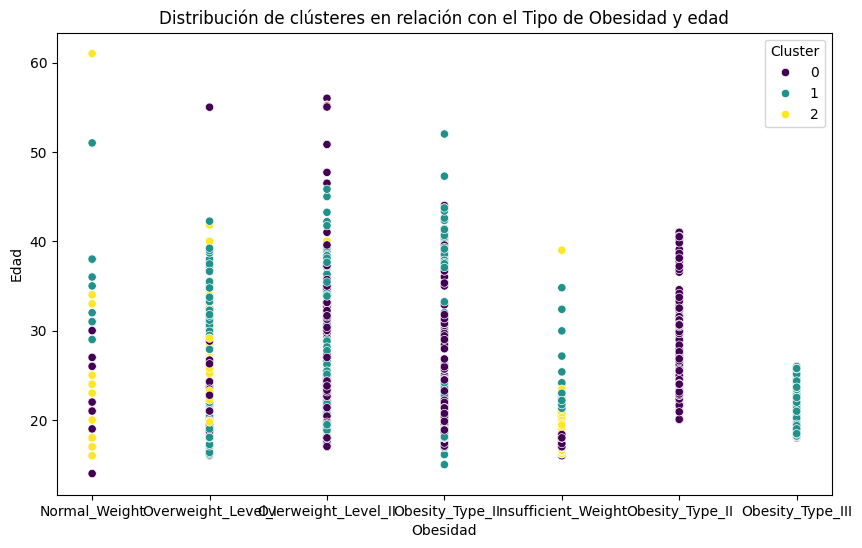

In [66]:
#Grafico de dispersión
plt.figure(figsize=(10, 6)) 
sns.scatterplot(data=df, x='NObeyesdad', y='Age', hue='Cluster', palette='viridis') 
plt.title('Distribución de clústeres en relación con el Tipo de Obesidad y edad') 
plt.xlabel('Obesidad') 
plt.ylabel('Edad') 
plt.show()

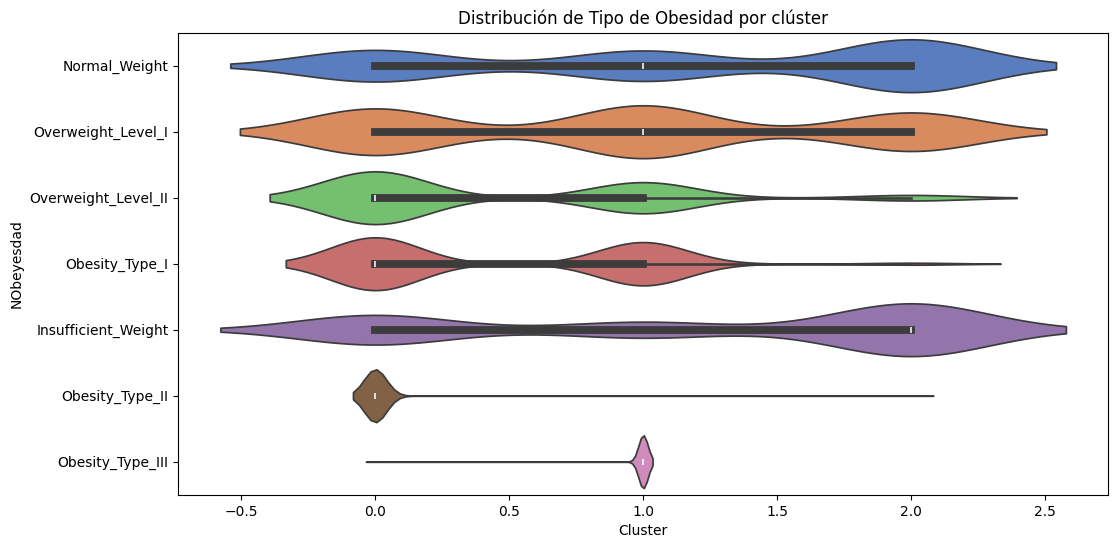

In [67]:
#Gráfico de violin
plt.figure(figsize=(12, 6)) 
sns.violinplot(data=df, x='Cluster', y='NObeyesdad', palette='muted') 
plt.title('Distribución de Tipo de Obesidad por clúster') 
plt.show()

<Figure size 1000x800 with 0 Axes>

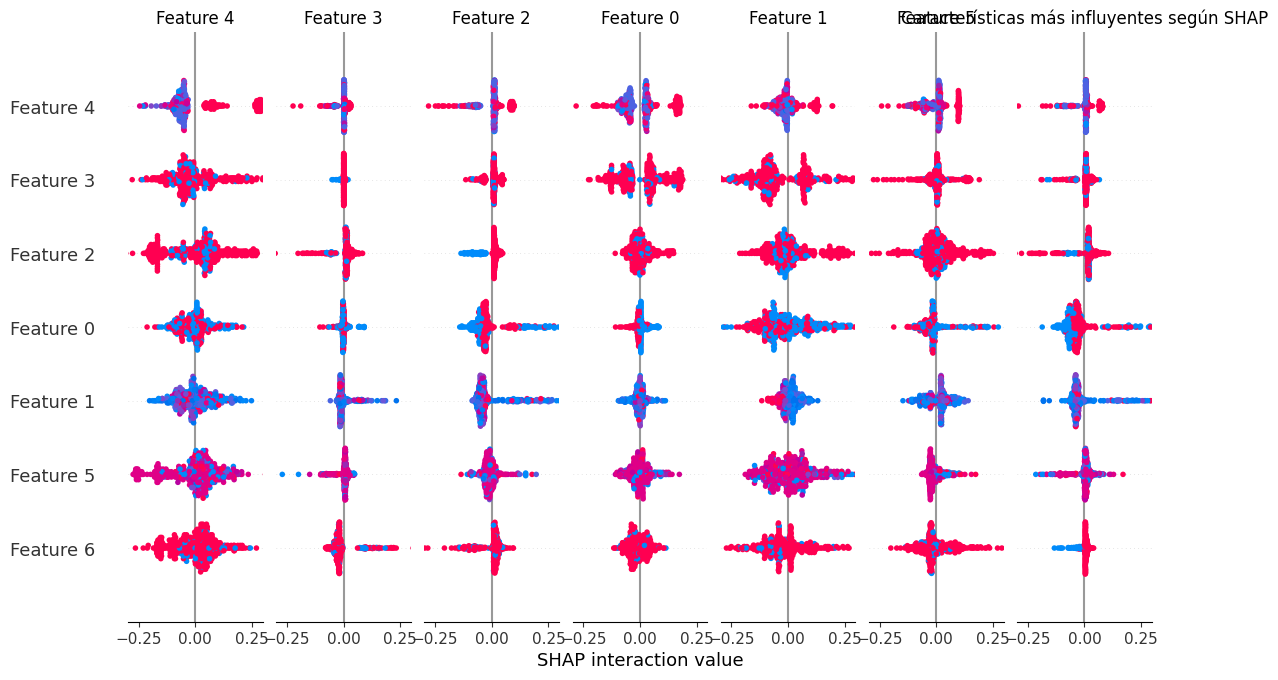

In [68]:
import shap

explainer = shap.Explainer(modelo_rf)
shap_values = explainer.shap_values(X_test_rf)
#shap_values = explainer(X_test)

#shap.summary_plot(shap_values, X_test)
#shap.summary_plot(shap_values, X_test,show=False)
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test_rf, plot_type="bar", show=False)
plt.title("Características más influyentes según SHAP")
plt.show()

<Figure size 1000x800 with 0 Axes>

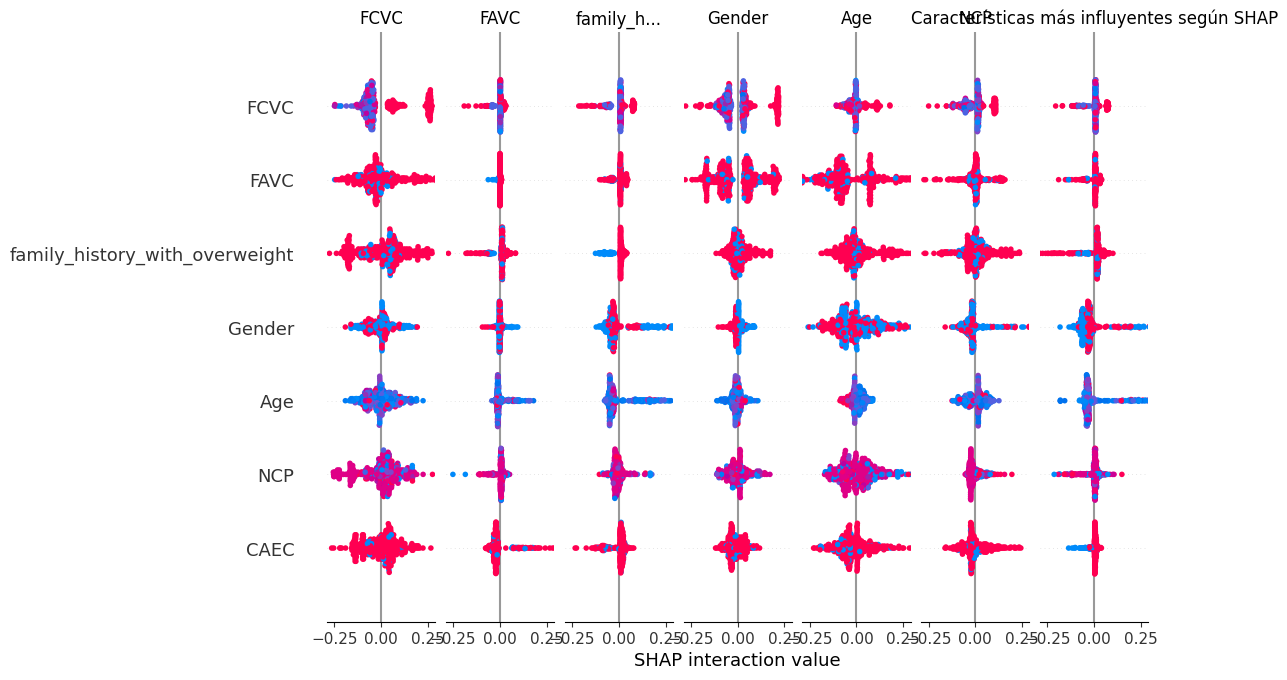

In [69]:
import shap

explainer = shap.Explainer(best_rf_grid)
shap_values = explainer.shap_values(X_test_gs)
#shap_values = explainer(X_test)

#shap.summary_plot(shap_values, X_test,show=False)
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test_gs, plot_type="bar", show=False)
plt.title("Características más influyentes según SHAP")
plt.show()